In [1]:
# Import Statements
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

## 1. Visualizing data

In [2]:
import pandas as pd
df=pd.read_csv("datos_df_p.csv")
print(df.head())

   Index  Pressure
0      1  86434.94
1      2  86435.55
2      3  86435.55
3      4  86434.63
4      5  86434.33


In [3]:
df

,Index,Pressure
0,1,86434.94
1,2,86435.55
2,3,86435.55
3,4,86434.63
4,5,86434.33
...,...,...
195,196,86435.21
196,197,86434.17
197,198,86433.55
198,199,86433.63


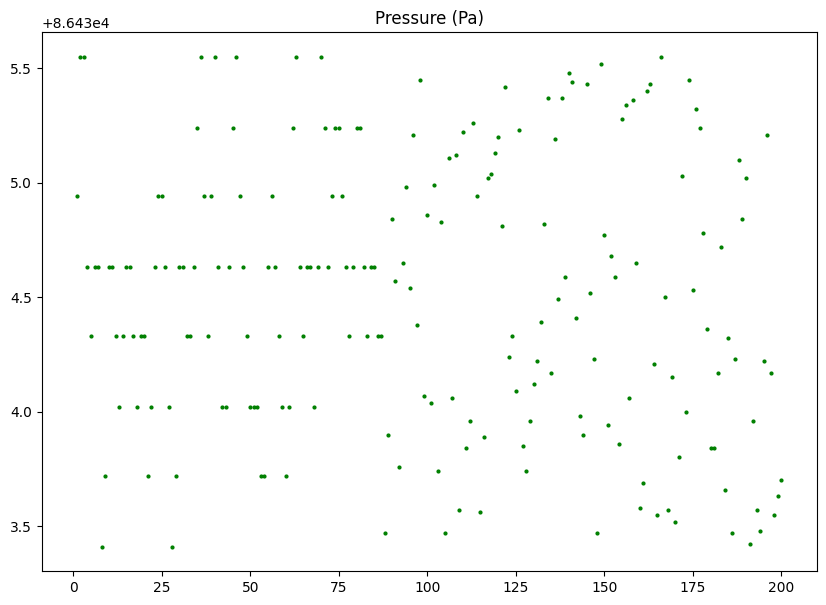

In [4]:
# Visualize temp information on plot scatters
plt.figure(figsize=(10,7))
# Plot temperature data
plt.scatter(df['Index'], df['Pressure'], c='g', s=4, label="Pressure")
# Plot title
plt.title("Pressure (Pa)")
# Show the plot
plt.show()

## 2. Preparing data

In [5]:
# Convert temperature and pressure to arrays
X_numpy = df['Pressure'].to_numpy()

X_numpy

array([86434.94, 86435.55, 86435.55, 86434.63, 86434.33, 86434.63,
       86434.63, 86433.41, 86433.72, 86434.63, 86434.63, 86434.33,
       86434.02, 86434.33, 86434.63, 86434.63, 86434.33, 86434.02,
       86434.33, 86434.33, 86433.72, 86434.02, 86434.63, 86434.94,
       86434.94, 86434.63, 86434.02, 86433.41, 86433.72, 86434.63,
       86434.63, 86434.33, 86434.33, 86434.63, 86435.24, 86435.55,
       86434.94, 86434.33, 86434.94, 86435.55, 86434.63, 86434.02,
       86434.02, 86434.63, 86435.24, 86435.55, 86434.94, 86434.63,
       86434.33, 86434.02, 86434.02, 86434.02, 86433.72, 86433.72,
       86434.63, 86434.94, 86434.63, 86434.33, 86434.02, 86433.72,
       86434.02, 86435.24, 86435.55, 86434.63, 86434.33, 86434.63,
       86434.63, 86434.02, 86434.63, 86435.55, 86435.24, 86434.63,
       86434.94, 86435.24, 86435.24, 86434.94, 86434.63, 86434.33,
       86434.63, 86435.24, 86435.24, 86434.63, 86434.33, 86434.63,
       86434.63, 86434.33, 86434.33, 86433.47, 86433.9 , 86434

In [6]:
# Randomize
np.random.shuffle(X_numpy)
X_numpy

array([86435.12, 86433.72, 86434.33, 86434.63, 86433.72, 86434.5 ,
       86435.55, 86434.94, 86434.99, 86434.33, 86435.19, 86434.33,
       86434.33, 86435.45, 86435.45, 86435.2 , 86435.55, 86434.33,
       86435.55, 86435.55, 86433.72, 86434.33, 86434.38, 86434.21,
       86433.85, 86433.9 , 86434.12, 86433.42, 86433.57, 86433.98,
       86434.63, 86434.59, 86433.76, 86433.96, 86433.47, 86434.63,
       86434.02, 86434.33, 86434.02, 86434.39, 86433.41, 86434.82,
       86435.24, 86434.02, 86434.94, 86434.63, 86433.7 , 86434.02,
       86435.4 , 86434.33, 86434.17, 86434.63, 86434.49, 86434.94,
       86433.74, 86434.02, 86434.94, 86435.52, 86433.86, 86434.33,
       86434.72, 86434.63, 86433.72, 86434.94, 86433.69, 86435.24,
       86433.56, 86433.72, 86434.  , 86434.02, 86434.86, 86434.98,
       86434.68, 86435.13, 86435.43, 86434.63, 86435.55, 86434.24,
       86435.28, 86433.41, 86433.57, 86435.55, 86435.03, 86434.33,
       86434.65, 86433.47, 86434.02, 86433.57, 86434.33, 86434

In [7]:
# Convert temperature to torch data bc of datatype
X_numpy.dtype

dtype('float64')

In [8]:
X_tensor = torch.from_numpy(X_numpy)

X_tensor

tensor([86435.1200, 86433.7200, 86434.3300, 86434.6300, 86433.7200, 86434.5000,
        86435.5500, 86434.9400, 86434.9900, 86434.3300, 86435.1900, 86434.3300,
        86434.3300, 86435.4500, 86435.4500, 86435.2000, 86435.5500, 86434.3300,
        86435.5500, 86435.5500, 86433.7200, 86434.3300, 86434.3800, 86434.2100,
        86433.8500, 86433.9000, 86434.1200, 86433.4200, 86433.5700, 86433.9800,
        86434.6300, 86434.5900, 86433.7600, 86433.9600, 86433.4700, 86434.6300,
        86434.0200, 86434.3300, 86434.0200, 86434.3900, 86433.4100, 86434.8200,
        86435.2400, 86434.0200, 86434.9400, 86434.6300, 86433.7000, 86434.0200,
        86435.4000, 86434.3300, 86434.1700, 86434.6300, 86434.4900, 86434.9400,
        86433.7400, 86434.0200, 86434.9400, 86435.5200, 86433.8600, 86434.3300,
        86434.7200, 86434.6300, 86433.7200, 86434.9400, 86433.6900, 86435.2400,
        86433.5600, 86433.7200, 86434.0000, 86434.0200, 86434.8600, 86434.9800,
        86434.6800, 86435.1300, 86435.43

In [9]:
# We need to work with 32float tensors
X = X_tensor.type(torch.float32)

X.dtype

torch.float32

### 2.1 Creating baselines

In [10]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create model with formula
start = 0
end = 1
step = 0.02
y = weight * X + bias
print(X[:10], y[:10])

tensor([86435.1172, 86433.7188, 86434.3281, 86434.6328, 86433.7188, 86434.5000,
        86435.5469, 86434.9375, 86434.9922, 86434.3281]) tensor([60504.8828, 60503.9023, 60504.3281, 60504.5430, 60503.9023, 60504.4492,
        60505.1836, 60504.7578, 60504.7930, 60504.3281])


In [11]:
len(X), len(y)

(200, 200)

In [12]:
# Create a train/test split for linear regression
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(160, 160, 40, 40)

### 2.2 Visualizing the train and test data

In [13]:
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions=None,
                     title="str"):
  """ Plots training data, test data and compares predictions """
  plt.figure(figsize=(10, 7))

  # Plot title
  plt.title(f"{title}")

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

  # Check if there are predicitions
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  # Show the legend
  plt.legend(prop={"size": 14});

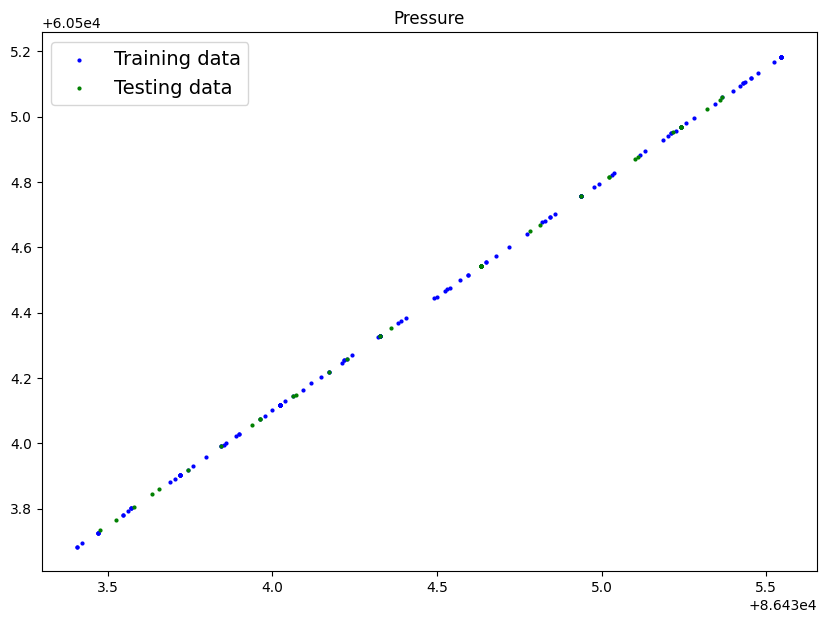

In [14]:
# For temperature
plot_predictions(X_train, y_train, X_test, y_test, title="Pressure")

## 3. Build a model

In [15]:
from torch import nn
# Create linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [16]:
 # Create a random seed
 torch.manual_seed(42)

 # Create an instance of the model (this is a subclass of nn.Module)
 model_0 = LinearRegressionModel()

 # Check out the parameters
 list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
# Look out what does parameters above refer to
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
# Check model device
next(model_0.parameters()).device

device(type='cpu')

In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [20]:
# Set model to GPU if available
model_0.to(device)
next(model_0.parameters()).device

device(type='cuda', index=0)

In [21]:
X_test

tensor([86435.3672, 86435.0234, 86434.6328, 86434.3281, 86434.9375, 86433.5234,
        86434.7812, 86435.1094, 86434.2266, 86433.6328, 86433.6562, 86435.2422,
        86433.8438, 86435.3203, 86433.7422, 86433.4766, 86434.6328, 86435.2422,
        86433.9609, 86434.6328, 86433.5781, 86435.2422, 86434.6328, 86434.9375,
        86435.2188, 86434.3281, 86434.0625, 86435.1016, 86435.2422, 86434.3594,
        86435.0234, 86434.6328, 86434.0703, 86435.3594, 86433.9375, 86434.8125,
        86434.1719, 86434.6328, 86433.9609, 86434.6328])

## 4. Train model

Go from a poor representation of the data to a better representation, which leads to less loss and more accuracy

In [22]:
# Check model_0 parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], device='cuda:0')),
             ('bias', tensor([0.1288], device='cuda:0'))])

In [23]:
# Set up a loss functions
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.0001)

### 4.1 Building a training loop
0. Loop through data
1. Forward pass (this involves data moving through our model's forward() functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimize zero grad
4. Loss backward - move backwards though the network to calculate the gradients of each of the parameters of our model with respect to the loss (backpropagation)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (gradient descent)

In [24]:
# Put data on available device
# If not, error will happen
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [25]:
X_train.shape

torch.Size([160])

In [26]:
# Make pre-preds
with torch.inference_mode():
  untrained_preds = model_0(X_test)

print(f"Lenght of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Lenght of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 labels: \n{y_test[:10]}")

Lenght of predictions: 40, Shape: torch.Size([40])
Lenght of test samples: 40, Shape: torch.Size([40])

First 10 predictions: 
tensor([29102.0840, 29101.9688, 29101.8379, 29101.7344, 29101.9395, 29101.4629,
        29101.8867, 29101.9980, 29101.7012, 29101.5000], device='cuda:0')

First 10 labels: 
tensor([60505.0586, 60504.8164, 60504.5430, 60504.3281, 60504.7578, 60503.7656,
        60504.6484, 60504.8750, 60504.2578, 60503.8438], device='cuda:0')


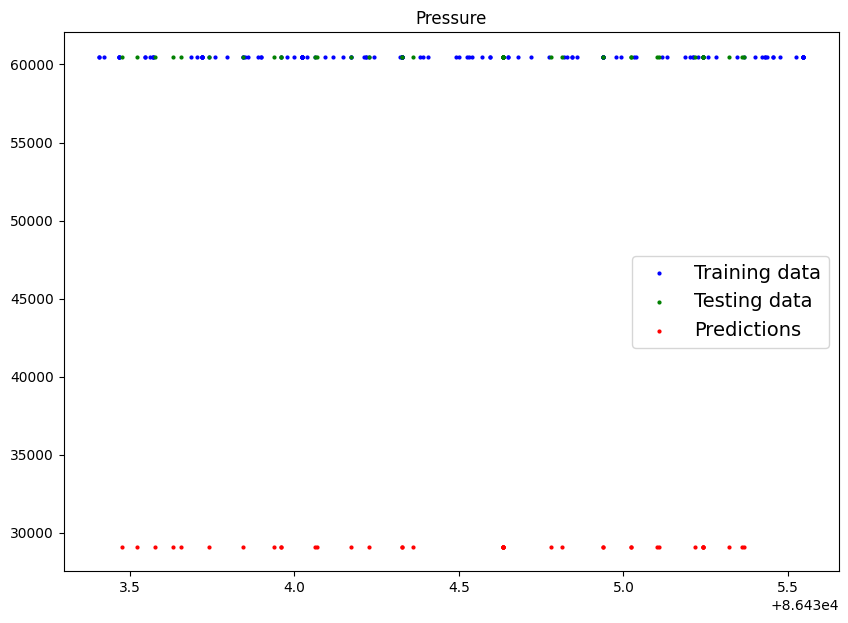

In [27]:
# For pressure
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), predictions=untrained_preds.cpu(), title="Pressure")

In [28]:
# Put data on available device
# If not, error will happen
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [29]:
# Building a training loop for temperature
torch.manual_seed(42)
# Define epochs
epochs = 100000

# Training
# 0. Loop through the data
for epoch in range(epochs):
  # Training mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  # Testing mode
  model_0.eval()

  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_0(X_test)

    # Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10000 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.4f} | Test loss: {test_loss:.4f}")

    # Print model state dict (we'll visualize adjusted parameters)
    print(model_0.state_dict())

Epoch: 0 | Train Loss: 31402.6562 | Test loss: 715689.8125
OrderedDict([('weights', tensor([8.9801], device='cuda:0')), ('bias', tensor([0.1289], device='cuda:0'))])
Epoch: 10000 | Train Loss: 31402.6934 | Test loss: 715689.8125
OrderedDict([('weights', tensor([8.9801], device='cuda:0')), ('bias', tensor([0.1289], device='cuda:0'))])
Epoch: 20000 | Train Loss: 31402.6934 | Test loss: 715689.8125
OrderedDict([('weights', tensor([8.9801], device='cuda:0')), ('bias', tensor([0.1289], device='cuda:0'))])
Epoch: 30000 | Train Loss: 31402.6934 | Test loss: 715689.8125
OrderedDict([('weights', tensor([8.9801], device='cuda:0')), ('bias', tensor([0.1289], device='cuda:0'))])
Epoch: 40000 | Train Loss: 31402.6934 | Test loss: 715689.8125
OrderedDict([('weights', tensor([8.9801], device='cuda:0')), ('bias', tensor([0.1289], device='cuda:0'))])
Epoch: 50000 | Train Loss: 31402.6934 | Test loss: 715689.8125
OrderedDict([('weights', tensor([8.9801], device='cuda:0')), ('bias', tensor([0.1289], devi

In [30]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.1288], device='cuda:0', requires_grad=True)]